# 입문자를 위한, 파이썬/R 데이터 분석  

## Part(2) - Day18 : 

]

## Today's mission

- 일별 수익률과 이동평균
- 변동성 지표 : 볼린저 밴드(Bollinger Bands)
- 모멘텀 지표 : RSI(Relative Strength Index)
- 추세지표 : MACD(Moving Average Convergence and Divergence)
- cufflinks로 QuantFig 그리기

]

## 변동성 지표 : 볼린저 밴드(Bollinger Bands)

볼린저 밴드(Bollinger Bands)는 1980년대 존 볼린저가 개발하고 2011년 상표권 취득한 주가 기술적 분석 도구이다. 트레이딩 밴드 개념에서 발전된 볼린저 밴드와 상대지표 그리고 대역폭은 이전 거래와의 상대적 가격의 높음과 낮음을 판단하는 데 사용된다. 볼린저 밴드는 켈트너 채널과 비슷한 변동성 지표이다. 볼린저 밴드는 주가가 이동평균선 중심으로 표준편차 범위 안에서 움직인다는 전제로 개발되었다.


볼린저 밴드는 다음과 같이 구성된다.
* N기간 동안의 이동평균(MA)
* 이동평균 위의 K배 표준편차 상위 밴드
* 이동평균 아래의 K배 표준편차 하위 밴드

일반적으로 N과 K의 값은 20과 2이다. 평균값의 기본 선택의 단순 이동 평균이지만, 필요에 따라 다른 종류의 평균값을 쓸 수 있다. 지수 이동 평균(Exponential moving averages)은 일반적인 대안이다. 대개 중간 밴드와 표준 편차의 계산을 위해 같은 기간을 사용한다.



* 출처 : [볼린저 밴드 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B3%BC%EB%A6%B0%EC%A0%80_%EB%B0%B4%EB%93%9C)

### 라이브러리 로드

In [47]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pandas 기본 예제의 볼린저 밴드
* 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-directly-with-matplotlib

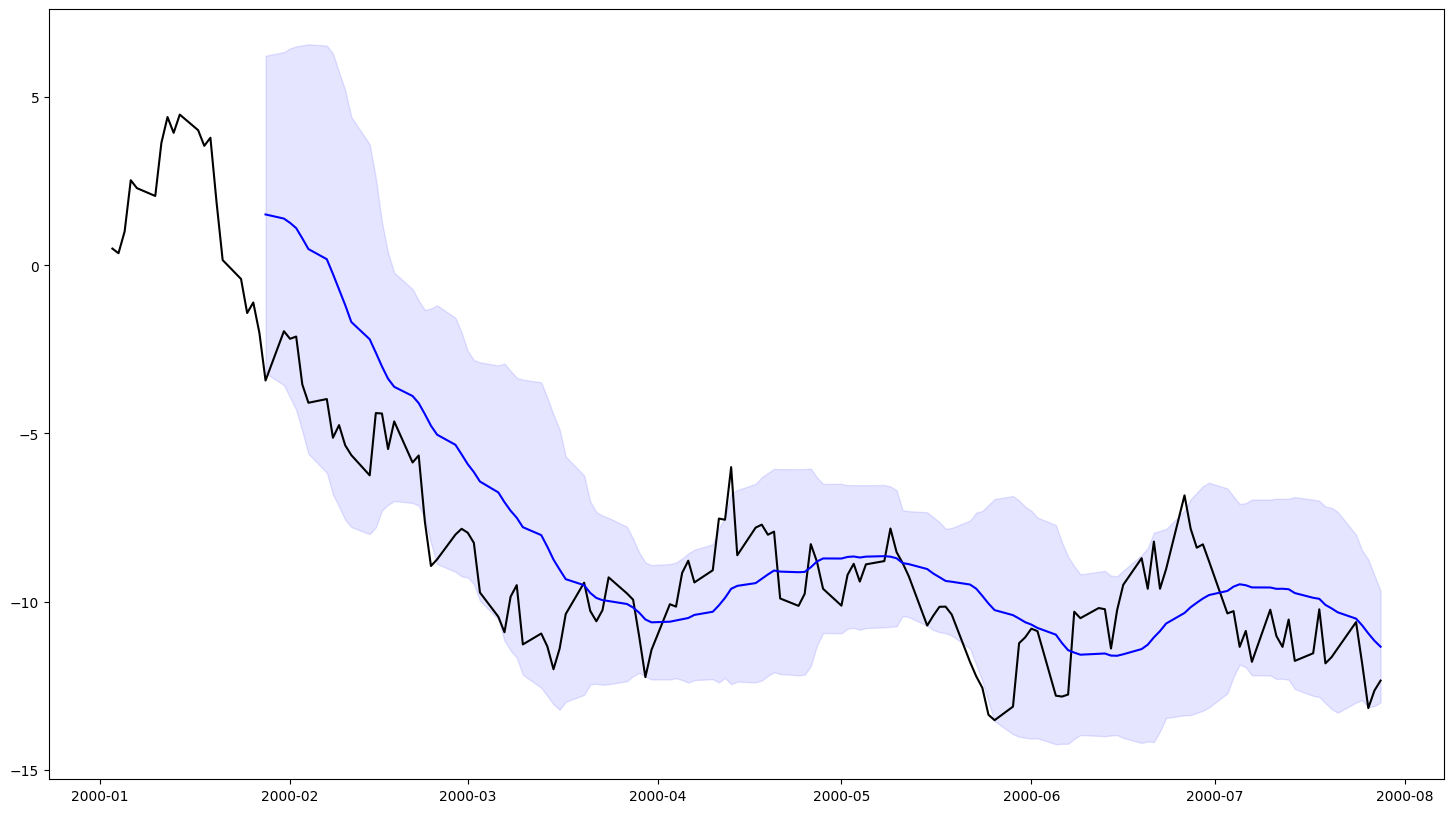

In [48]:
np.random.seed(42)
price = pd.Series(
    np.random.randn(150).cumsum(),
    index=pd.date_range("2000-1-1", periods=150, freq="B"),
)
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure(figsize=(18,10))
plt.plot(price.index, price, "k")
plt.plot(ma.index, ma, "b")
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.1)

### 개별종목 일별시세 가져오기

In [49]:
# FinanceDataReader가 설치되어 있지 않다면 주석을 풀고 설치해 주세요. 
# 주석을 푸는 방법은 아래 코드의 맨 앞에 있는 #을 지워주시면 됩니다.
#!pip install -U finance-datareader

In [50]:
# FinanceDataReader 불러오기
import FinanceDataReader as fdr

In [51]:
# 005930 : 삼성전자
df = fdr.DataReader("005930", "2022")
df.shape

(651, 6)

In [52]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2024-08-19,80100,80100,78000,78300,14146565,-0.023691
2024-08-20,79500,79800,78700,78900,10683836,0.007663
2024-08-21,77900,78600,77800,78300,7805598,-0.007605


### 20일간 종가의 이동평균

In [53]:
df["Close"].rolling(20).mean()

Date
2022-01-03        NaN
2022-01-04        NaN
2022-01-05        NaN
2022-01-06        NaN
2022-01-07        NaN
               ...   
2024-08-19    78650.0
2024-08-20    78445.0
2024-08-21    78165.0
2024-08-22    77980.0
2024-08-23    77840.0
Name: Close, Length: 651, dtype: float64

In [54]:
# 20일간 종가의 이동평균
df["MA20"] = df["Close"].rolling(20).mean()

### 분산과 표준편차

* [Pandas Bollinger Bands 예제](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-directly-with-matplotlib)

* 표준편차
    * 표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다. 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합에 적용된다. 관례에 따라 모집단은 그리스문자로 표본은 영어 알파벳으로 표기하는데, 모집단의 표준편차는 σ(시그마)로, 표본의 표준편차는 s(에스)로 나타낸다
    * 편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.
    * 분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.
    * 표준 편차(standard deviation)는 분산을 제곱근한 것이다. 편차들(deviations)의 제곱합(SS, sum of square)에서 얻어진 값의 평균치인 분산의 성질로 부터 다시 제곱근해서 원래 단위로 만들어줌으로써 얻게된다.

* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png" width="500">


* 통계학에서 68-95-99.7 규칙(영어: 68-95-99.7 rule)은 정규 분포를 나타내는 규칙으로, 경험적인 규칙(empirical rule)이라고도 한다. 3시그마 규칙(three-sigma rule)이라고도 하는데 이 때는 평균에서 양쪽으로 3표준편차의 범위에 거의 모든 값들(99.7%)이 들어간다는 것을 나타낸다.

* 약 68%의 값들이 평균에서 양쪽으로 1 표준편차 범위(μ±σ)에 존재한다.
* **약 95%의 값들이 평균에서 양쪽으로 2 표준편차 범위(μ±2σ)에 존재한다.**
* 거의 모든 값들(실제로는 99.7%)이 평균에서 양쪽으로 3표준편차 범위(μ±3σ)에 존재한다.

* 출처 : [68-95-99.7 규칙 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99)

In [55]:
# 종가의 기술 통계 값
df["Close"].describe()

count      651.000000
mean     68701.689708
std       7668.574047
min      52600.000000
25%      61800.000000
50%      69200.000000
75%      73550.000000
max      87800.000000
Name: Close, dtype: float64

In [56]:
# 분산
df["Close"].var()

58807027.909724675

In [57]:
# 표준편차 == 분산의 제곱근
np.sqrt(df["Close"].var())

7668.5740467002515

In [58]:
df["Close"].var() ** 0.5

7668.5740467002515

In [59]:
# 표준편차
df["Close"].std()

7668.5740467002515

### 20일간 종가 이동평균과 표준편차

In [60]:
# 20일간 종가의 표준편차
# UpperB = 종가의 이동평균 + (표준편차 * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["stddev"] = df["Close"].rolling(20).std()
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB
Date,,,,,,,,,,
2024-08-19,80100,80100,78000,78300,14146565,-0.023691,78650.0,3949.217111,86548.434222,70751.565778
2024-08-20,79500,79800,78700,78900,10683836,0.007663,78445.0,3815.684391,86076.368781,70813.631219
2024-08-21,77900,78600,77800,78300,7805598,-0.007605,78165.0,3593.308840,85351.617680,70978.382320
2024-08-22,78700,78900,77800,78300,8149101,0.000000,77980.0,3478.898797,84937.797595,71022.202405
2024-08-23,77700,78100,77500,77600,4173039,-0.008940,77840.0,3432.415139,84704.830277,70975.169723


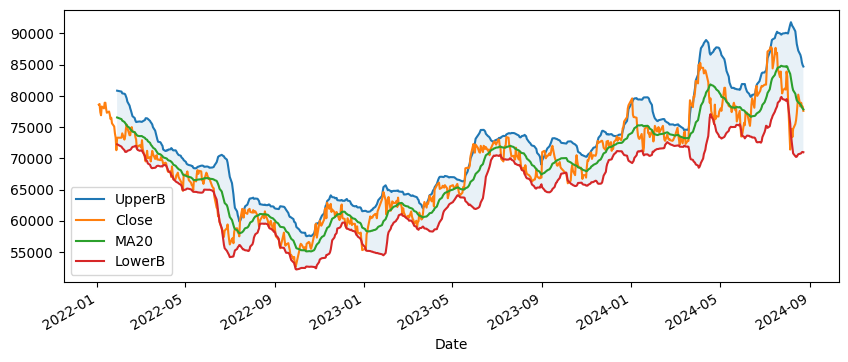

In [61]:
# "UpperB", "Close", "LowerB" 를 시각화 합니다.
df[["UpperB", "Close", "MA20", "LowerB"]].plot(figsize=(10, 4))
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.1)

In [62]:
#plt.fill_between??

### pyplot을 통한 볼린저 밴드 시각화

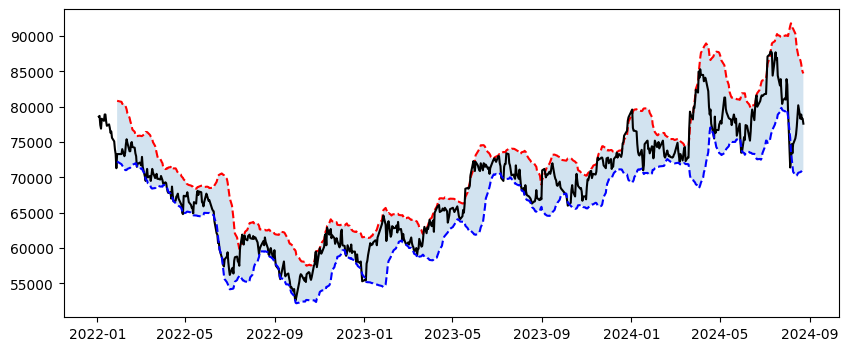

In [63]:
# pyplot을 통해 볼린저밴드를 시각화 합니다.
plt.figure(figsize=(10, 4))
plt.plot(df.index, df.UpperB, "r--")
plt.plot(df.index, df.Close, "k")
plt.plot(df.index, df.LowerB, "b--")
plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)

### %밴드
* %밴드를 통해 추세가 아닌 **주가의 상대적인 위치**를 파악할 수 있습니다.
* 0 보다 작거나 1보다 큰 구간은 밴드의 범위를 벗어난 구간으로 볼 수 있습니다.

In [64]:
# PercentB = 종가 - 하위밴드 / 상위밴드 - 하위밴드
df["PercentB"] = (df["Close"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])

In [65]:
df["PercentB"].describe()

count    632.000000
mean       0.489363
std        0.324841
min       -0.265612
25%        0.216877
50%        0.480785
75%        0.769304
max        1.329108
Name: PercentB, dtype: float64

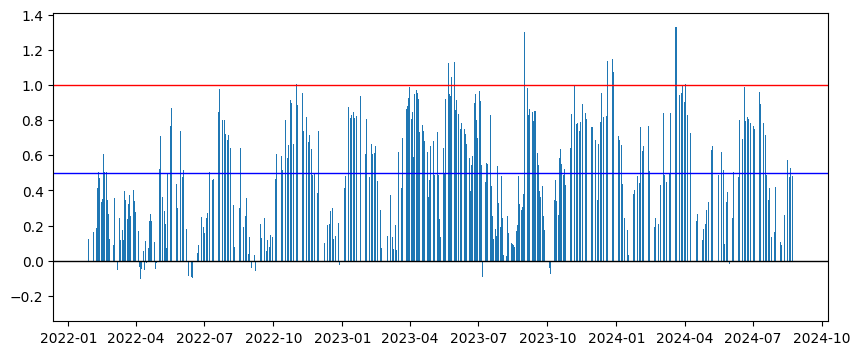

In [66]:
# 밴드 내에서 주가의 상대적인 위치를 시각화 합니다.
# 1보다 크면 밴드폭 상단을 돌파한 것이고
# 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.
plt.figure(figsize=(10, 4))
plt.bar(df.index, df["PercentB"])
plt.axhline(1, c="r", lw=1)
plt.axhline(0.5, c="b", lw=1)
plt.axhline(0, c="k", lw=1)

In [67]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB,PercentB
Date,,,,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,NaN,NaN
2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,NaN,NaN
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,NaN,NaN
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,NaN,NaN
2022-01-07,78100,78400,77400,78300,15163757,0.018205,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19,80100,80100,78000,78300,14146565,-0.023691,78650.0,3949.217111,86548.434222,70751.565778,0.477844
2024-08-20,79500,79800,78700,78900,10683836,0.007663,78445.0,3815.684391,86076.368781,70813.631219,0.529811
2024-08-21,77900,78600,77800,78300,7805598,-0.007605,78165.0,3593.308840,85351.617680,70978.382320,0.509392


Accuracy: 0.95


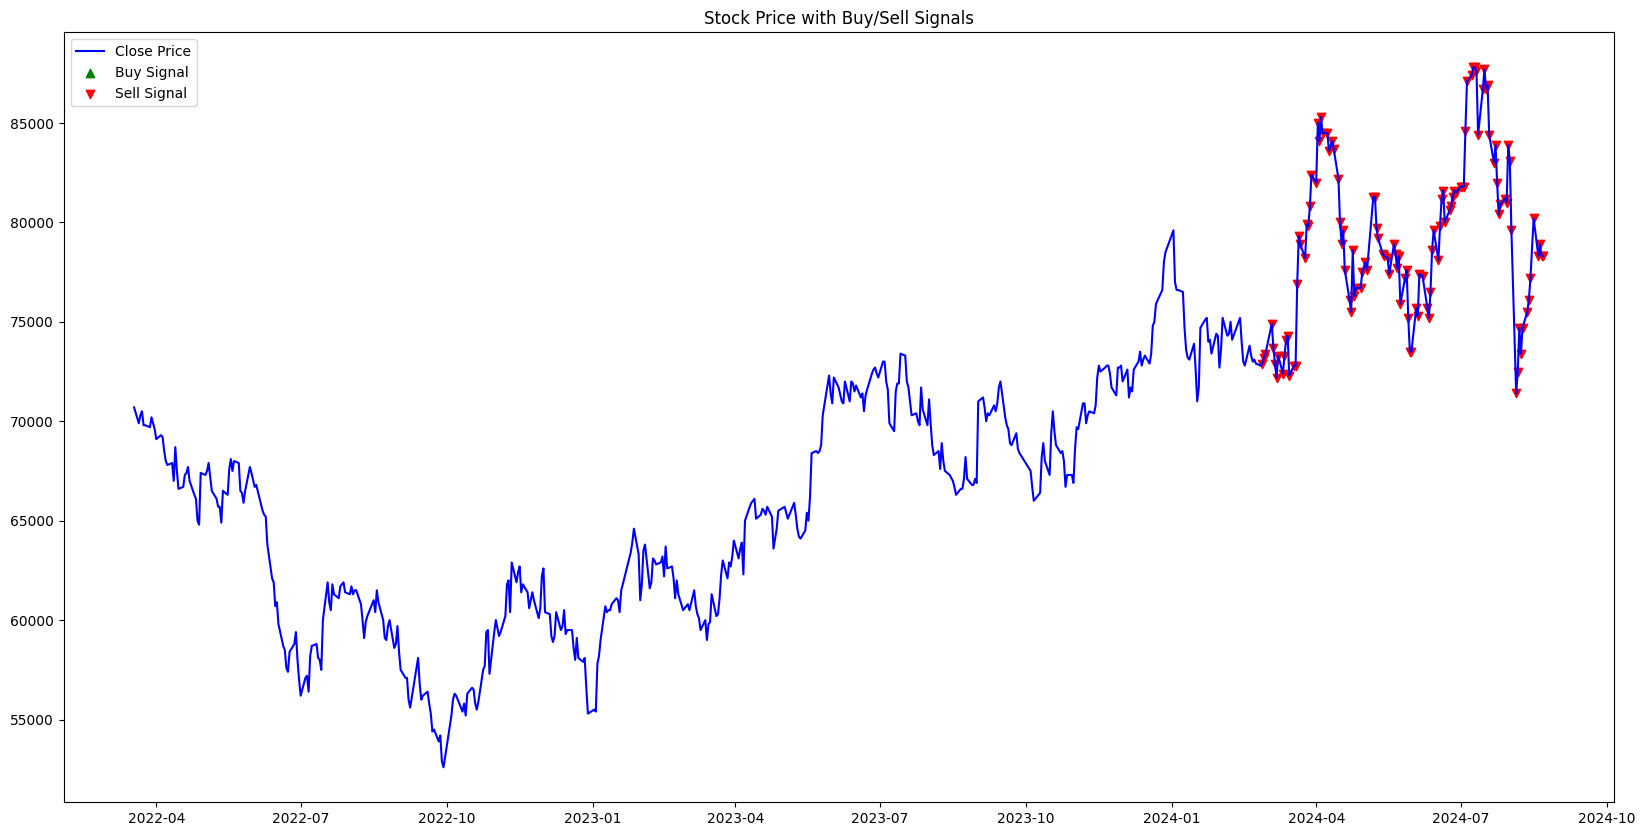

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 데이터 로드
# data = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')
data = df.copy()

# 2. 피처 엔지니어링
# 이동 평균
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# 볼린저 밴드
data['BB_upper'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
data['BB_lower'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()

# RSI
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# 결측치 제거
data = data.dropna()

# 3. 타겟 변수 설정
data['Signal'] = 0  # 기본적으로 매도(0)
data.loc[data['Close'] < data['BB_lower'], 'Signal'] = 1  # 저점에서 매수
data.loc[data['Close'] > data['BB_upper'], 'Signal'] = 0  # 고점에서 매도

# 타겟 변수 시프트 (다음 날을 예측)
data['Target'] = data['Signal'].shift(-1)
data = data.dropna()

# 4. 데이터 분할
X = data.drop(['Target', 'Signal'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 6. 결과 시각화
plt.figure(figsize=(20, 10))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(X_test.index[y_pred == 1], X_test['Close'][y_pred == 1], label='Buy Signal', marker='^', color='green')
plt.scatter(X_test.index[y_pred == 0], X_test['Close'][y_pred == 0], label='Sell Signal', marker='v', color='red')
plt.title('Stock Price with Buy/Sell Signals')
plt.legend()
plt.show()

### 밴드폭
* 밴드폭을 통해 향후 주가의 상승 또는 하락을 알 수는 없지만 추세 전환 신호로 활용할 수 있습니다.

In [68]:
# bandwidth = ( 상위밴드 - 하위밴드 ) / 이동평균
df["bandwidth"] = (df["UpperB"] - df["LowerB"]) / df["MA20"]

<Axes: xlabel='Date'>

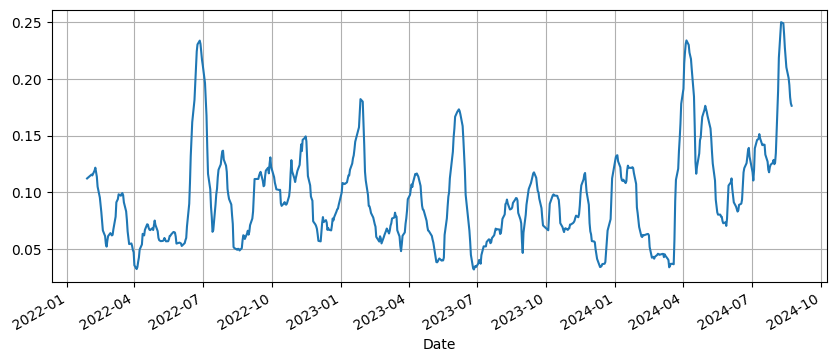

In [69]:
# 밴드폭 시각화
df["bandwidth"].plot(figsize=(10, 4), grid=True)

In [70]:
# head 로 변수들이 잘 생성되었는지 확인 합니다.
df.head()

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB,PercentB,bandwidth
Date,,,,,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,78100,78400,77400,78300,15163757,0.018205,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# tail로 변수들이 잘 생성되었는지 확인합니다.
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stddev,UpperB,LowerB,PercentB,bandwidth
Date,,,,,,,,,,,,
2024-08-19,80100,80100,78000,78300,14146565,-0.023691,78650.0,3949.217111,86548.434222,70751.565778,0.477844,0.200850
2024-08-20,79500,79800,78700,78900,10683836,0.007663,78445.0,3815.684391,86076.368781,70813.631219,0.529811,0.194566
2024-08-21,77900,78600,77800,78300,7805598,-0.007605,78165.0,3593.308840,85351.617680,70978.382320,0.509392,0.183883
2024-08-22,78700,78900,77800,78300,8149101,0.000000,77980.0,3478.898797,84937.797595,71022.202405,0.522996,0.178451
2024-08-23,77700,78100,77500,77600,4173039,-0.008940,77840.0,3432.415139,84704.830277,70975.169723,0.482520,0.176383


### 볼린저 밴드를 구하는 함수 만들기

* Matplotlib 명칭 이해 : [Anatomy of a figure — Matplotlib 3.3.4 documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

In [83]:
# 볼린저 밴드를 plot하는 함수
# Close column값으로 20일 단위(rolling, window) 의 이동평균(mean)과
# 표준편차(std)를 구한다
# upper/lower band는 이동평균 +/- 표준편차x2 로 구합니다.

# plot 내에서 'k:' 등으로 색깔및 라인의 스타일을 지정할 수 있습니다.
# (k:black, r:red, b:blue, c:cyan, y:yellow 등등, color = '#0000ff'등으로 html색상표를 사용할 수도 있습니다.)
# fill_between으로 두개의 line 사이를 채울수도 있습니다.
# legend의 loc parameter는 기본값이 'best'이며 legend의 위치를 지정할 수 있습니다. (0~10의 값으로 대체 가능)

def show_bband(df, n=20, k=2):
    """
    볼린저 밴드
    N기간 동안의 이동평균(MA)
    이동평균 위의 K배 표준편차 상위 밴드
    이동평균 아래의 K배 표준편차 하위 밴드
    일반적으로 N과 K의 값은 20과 2
    """
    # 그래프의 스타일 설정
    plt.style.use("seaborn-v0_8-whitegrid")
    # 20일간 종가의 이동평균
    df["MA20"] = df["Close"].rolling(20).mean()
    # 20일간 종가의 표준편차
    df["stddev"] = df["Close"].rolling(20).std()
    # 종가의 이동평균 + (표준편차 * 2)
    df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
    # 종가의 이동평균 - (표준편차 * 2)
    df["LowerB"] = df["MA20"] - (df["stddev"] * 2)
    df = df[19:].copy()
    
    # window size 로 18번 인덱스까지(0~18) Nan 값이기 때문에 19번 인덱스 부터 사용
    plt.figure(figsize=(20, 8))
    plt.plot(df.index, df.UpperB, "r--", label="UpperB")
    plt.plot(df.index, df.Close, "k")
    plt.plot(df.index, df.LowerB, "b--", label="LowerB")
    plt.plot(df.index, df.MA20)
    plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)
    plt.legend(loc="best")
    plt.title("Bollinger Bands")

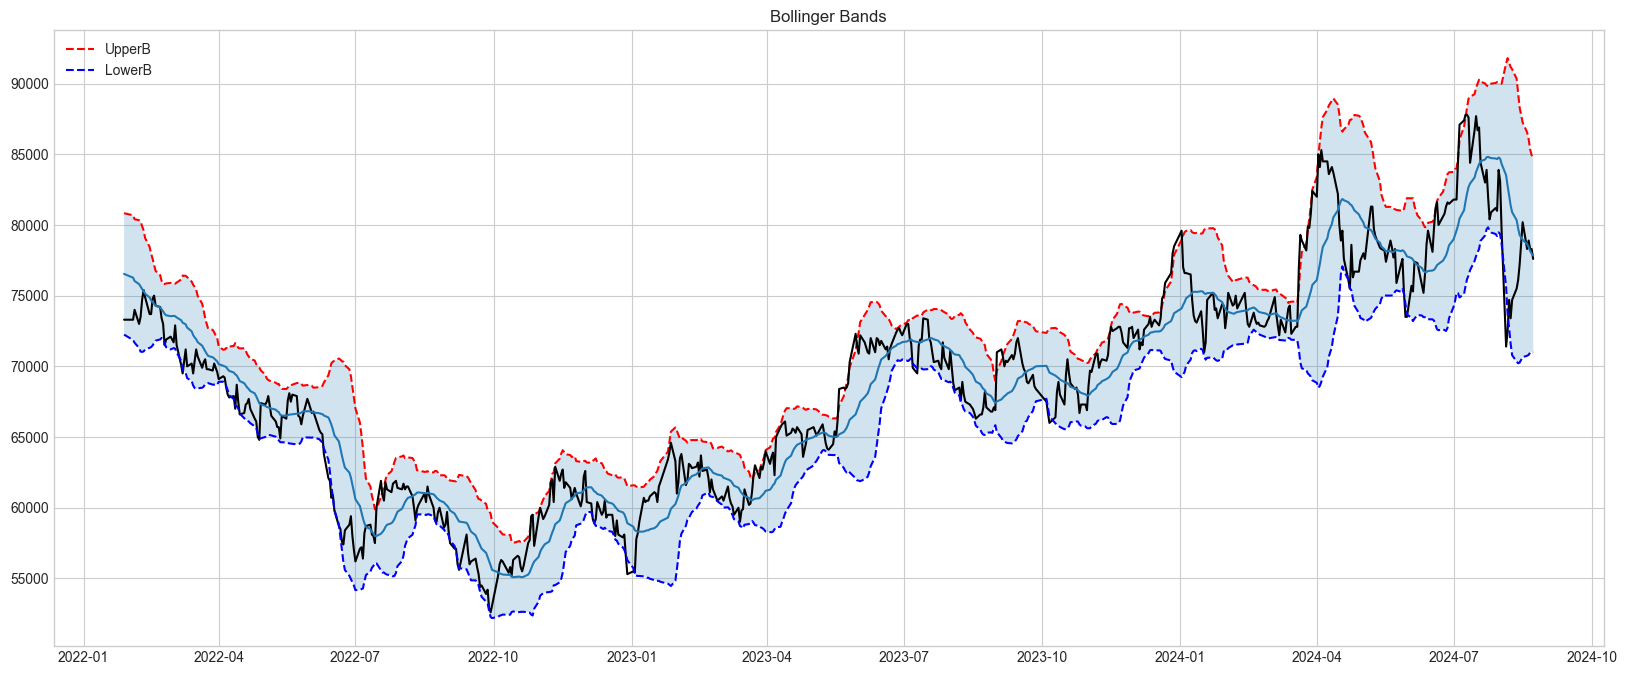

In [84]:
# 함수 확인하기
show_bband(df)

### 볼린저 밴드로 해외 주가 시각화

In [92]:
# FinanceDataReader의 DataReader는 미국 주식의 경우 종목코드대신 티커(Ticker)를 사용합니다.
# 티커는 약자와 비슷합니다.(마이크로소프트:MSFT, 스타벅스:SBUX 등등)
amd = fdr.DataReader("AMD", "2021")

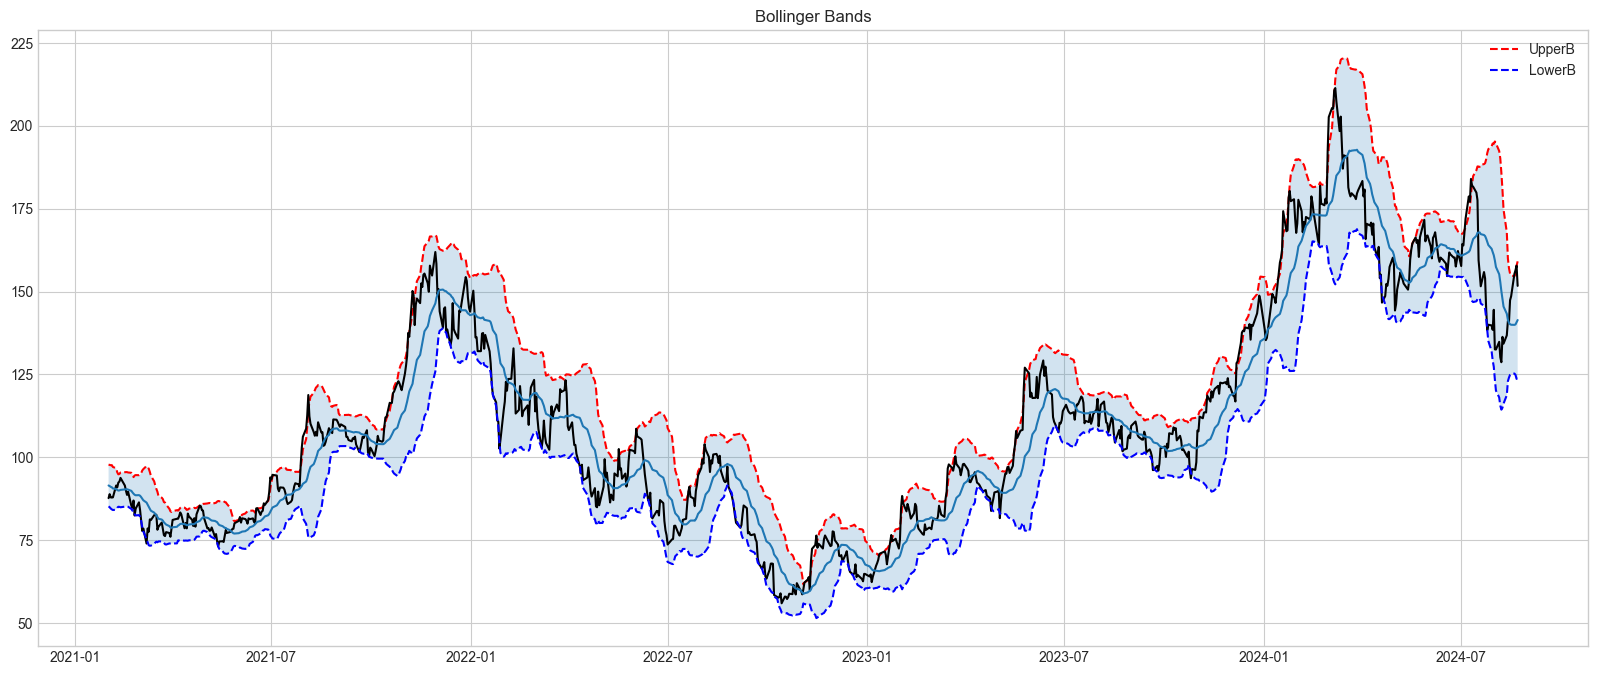

In [93]:
# AMD
show_bband(amd)

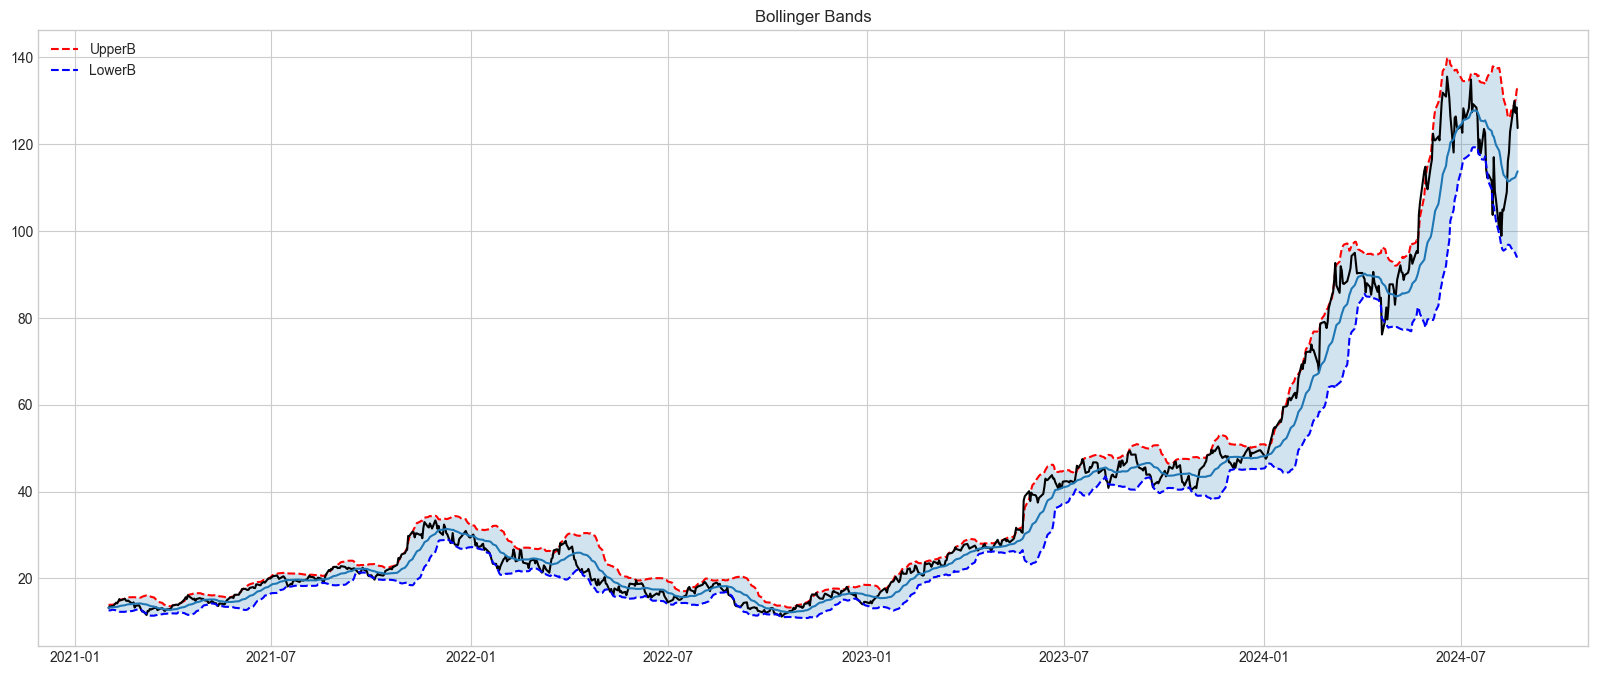

In [94]:
# NVIDA : NVDA
show_bband(fdr.DataReader("NVDA", "2021"))

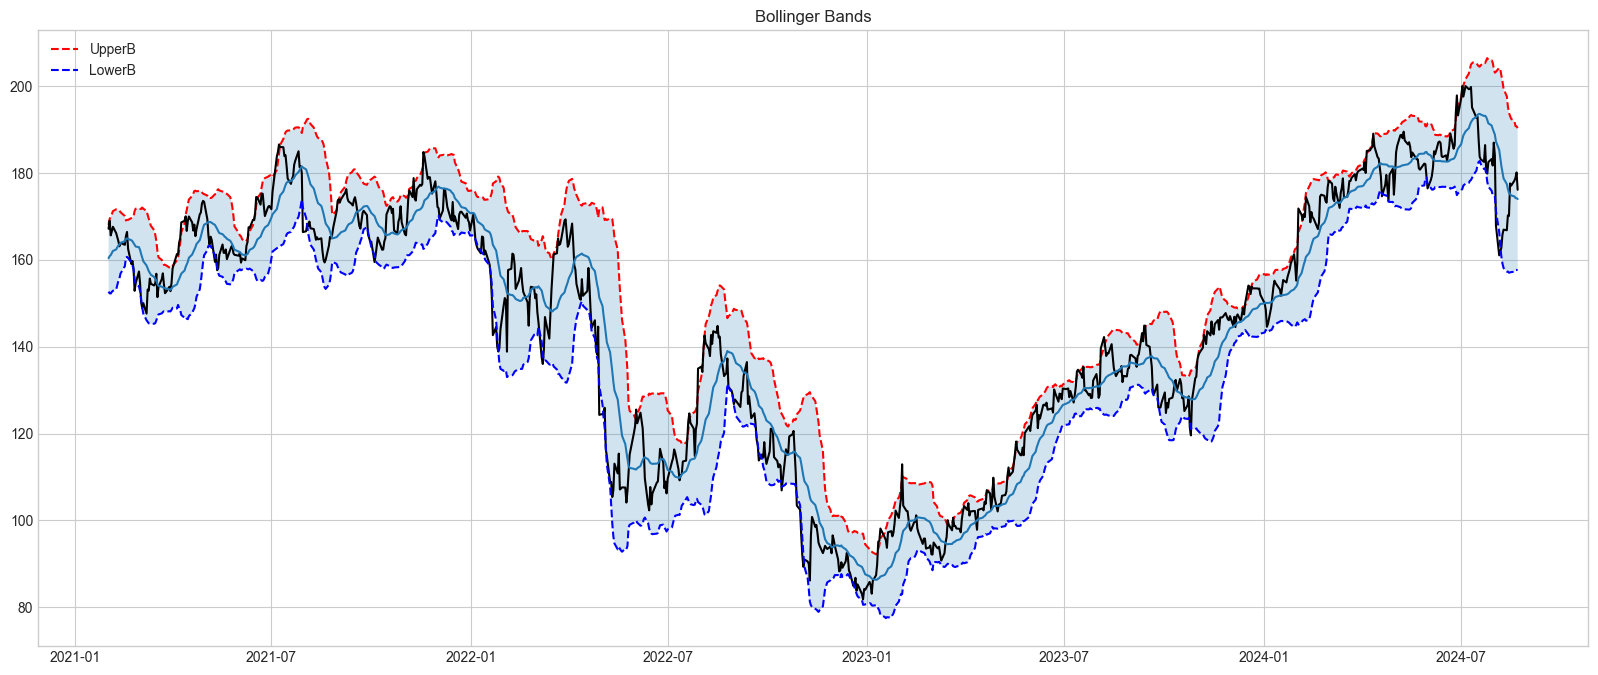

In [95]:
# 아마존 : AMZN
show_bband(fdr.DataReader("AMZN", "2021"))

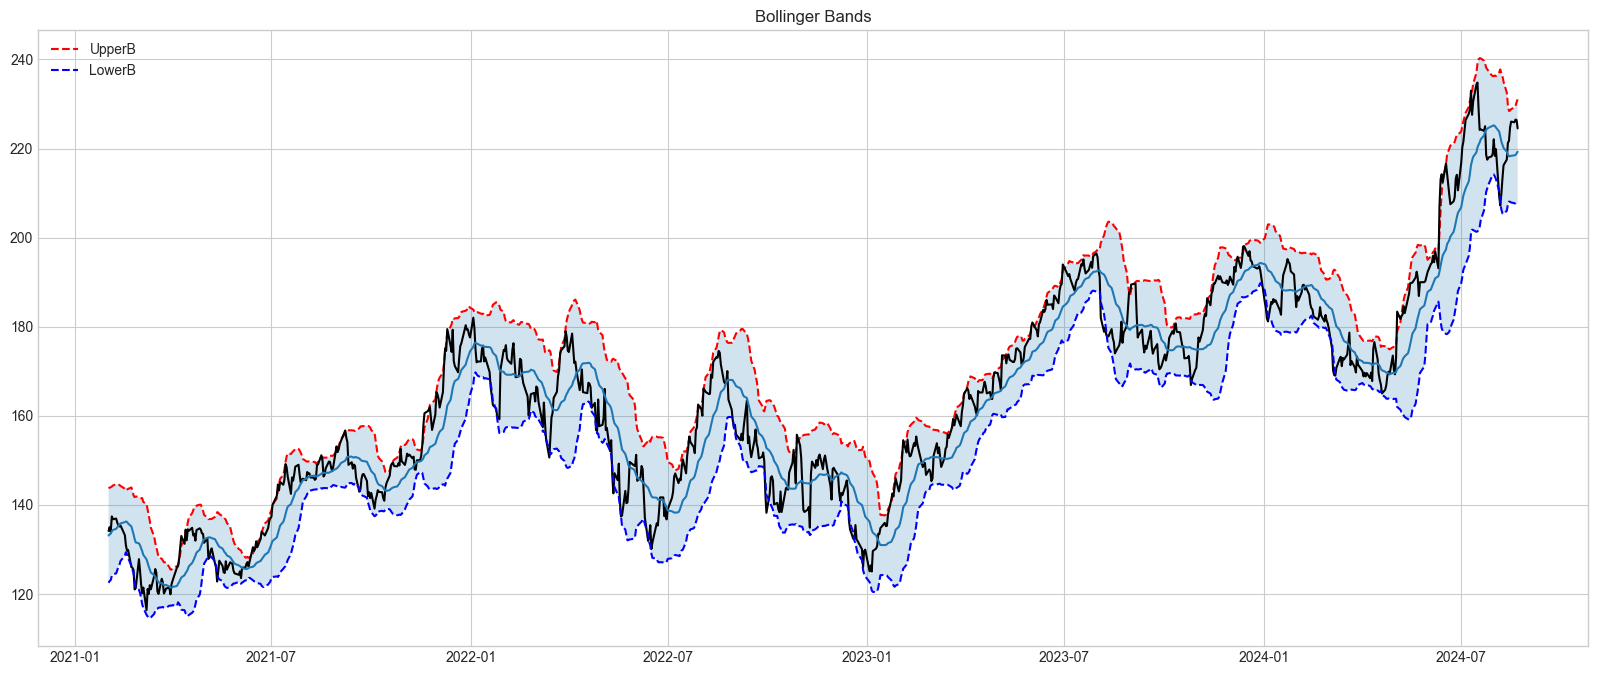

In [96]:
# Apple : AAPL
show_bband(fdr.DataReader("AAPL", "2021"))

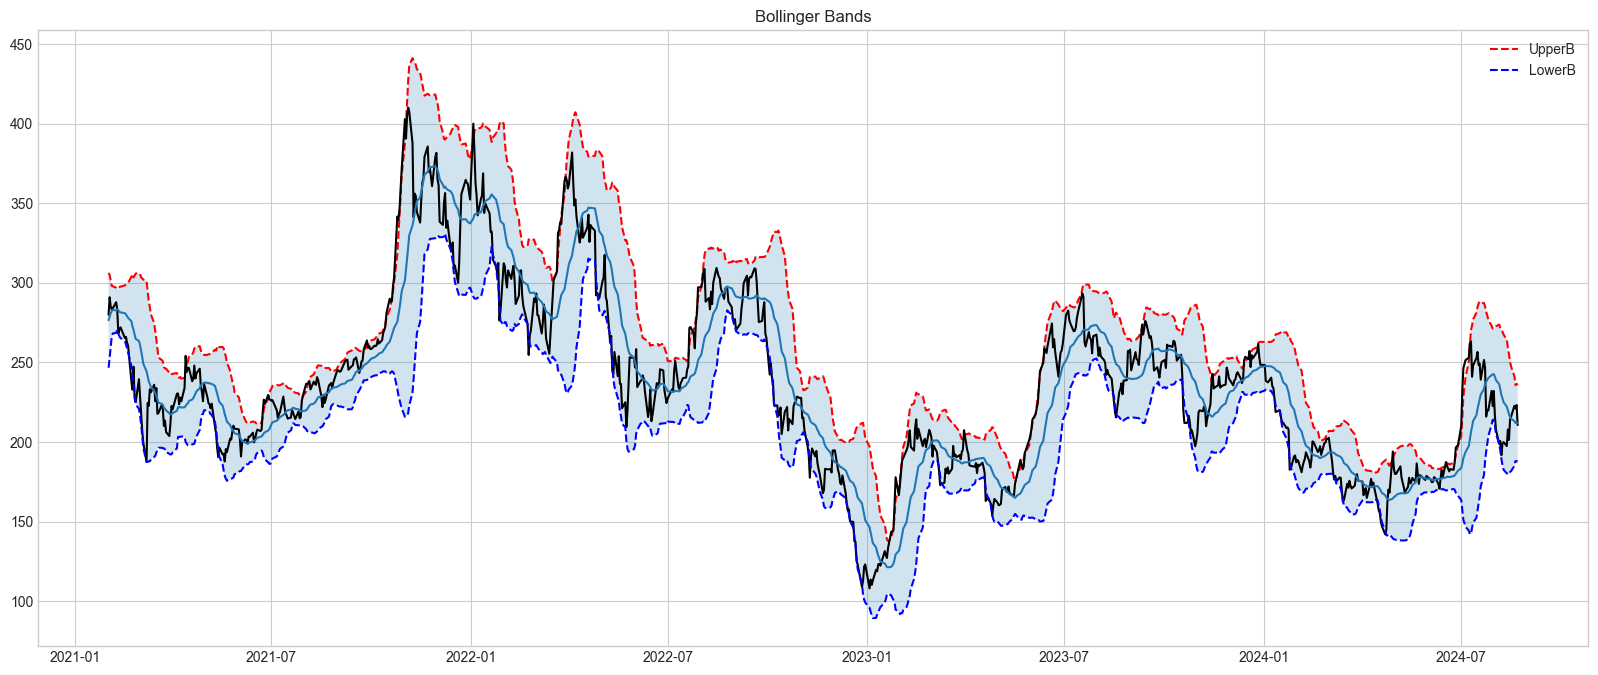

In [97]:
# TESLA : TSLA
show_bband(fdr.DataReader("TSLA", "2021"))

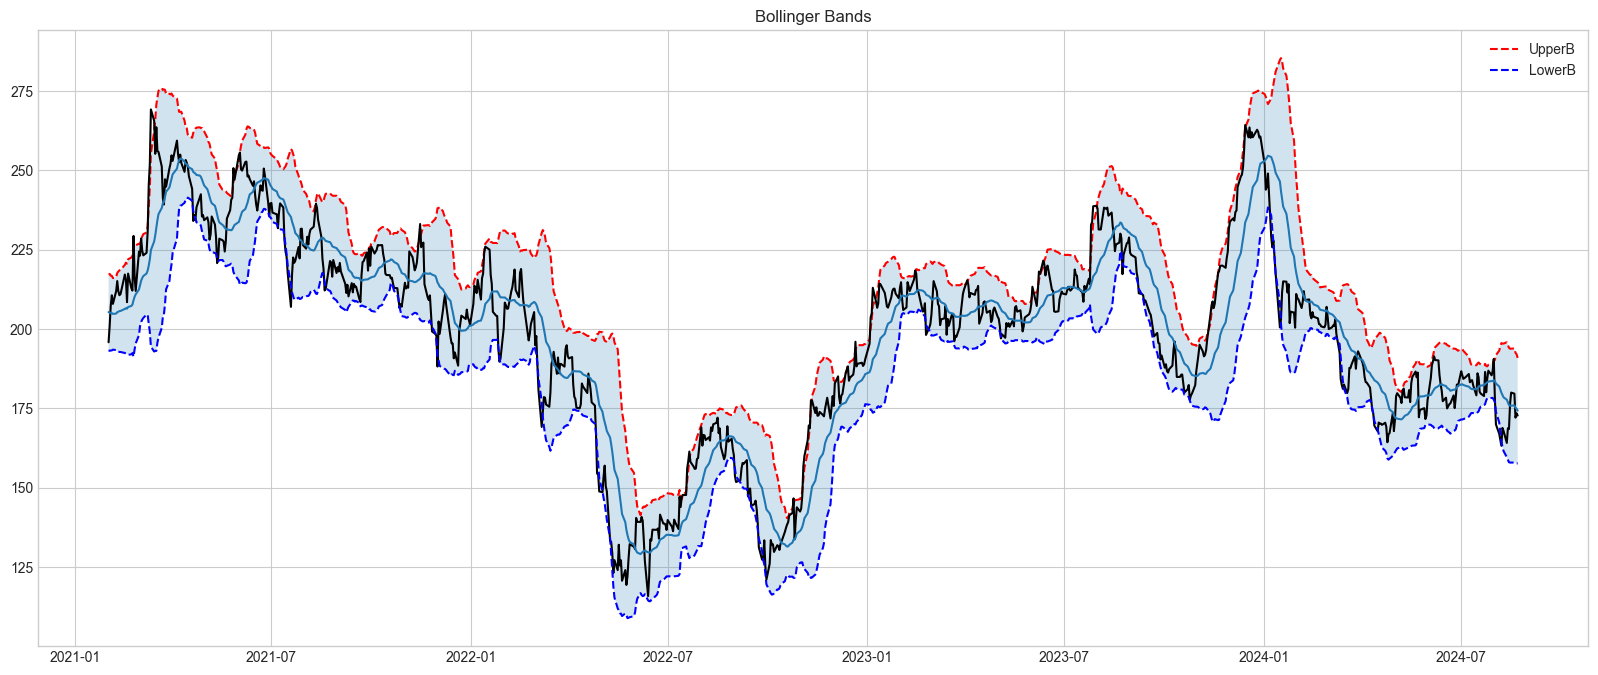

In [98]:
# Boeing : BA
show_bband(fdr.DataReader("BA", "2021"))